In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# import data from sklearn
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# The outcome variable must be binary
f'The outcome variable is {np.unique(data.target)} meaning the tumor could be {np.unique(data.target_names)}'

"The outcome variable is [0 1] meaning the tumor could be ['benign' 'malignant']"

In [5]:
data.data.shape, data.feature_names.shape

((569, 30), (30,))

In [6]:
# make a dataframe from the data
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
# make the columns as features and investigate at the same time whether they have multicollinearity or not (high correlation)
columns = df.columns.to_list()[:10]
columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

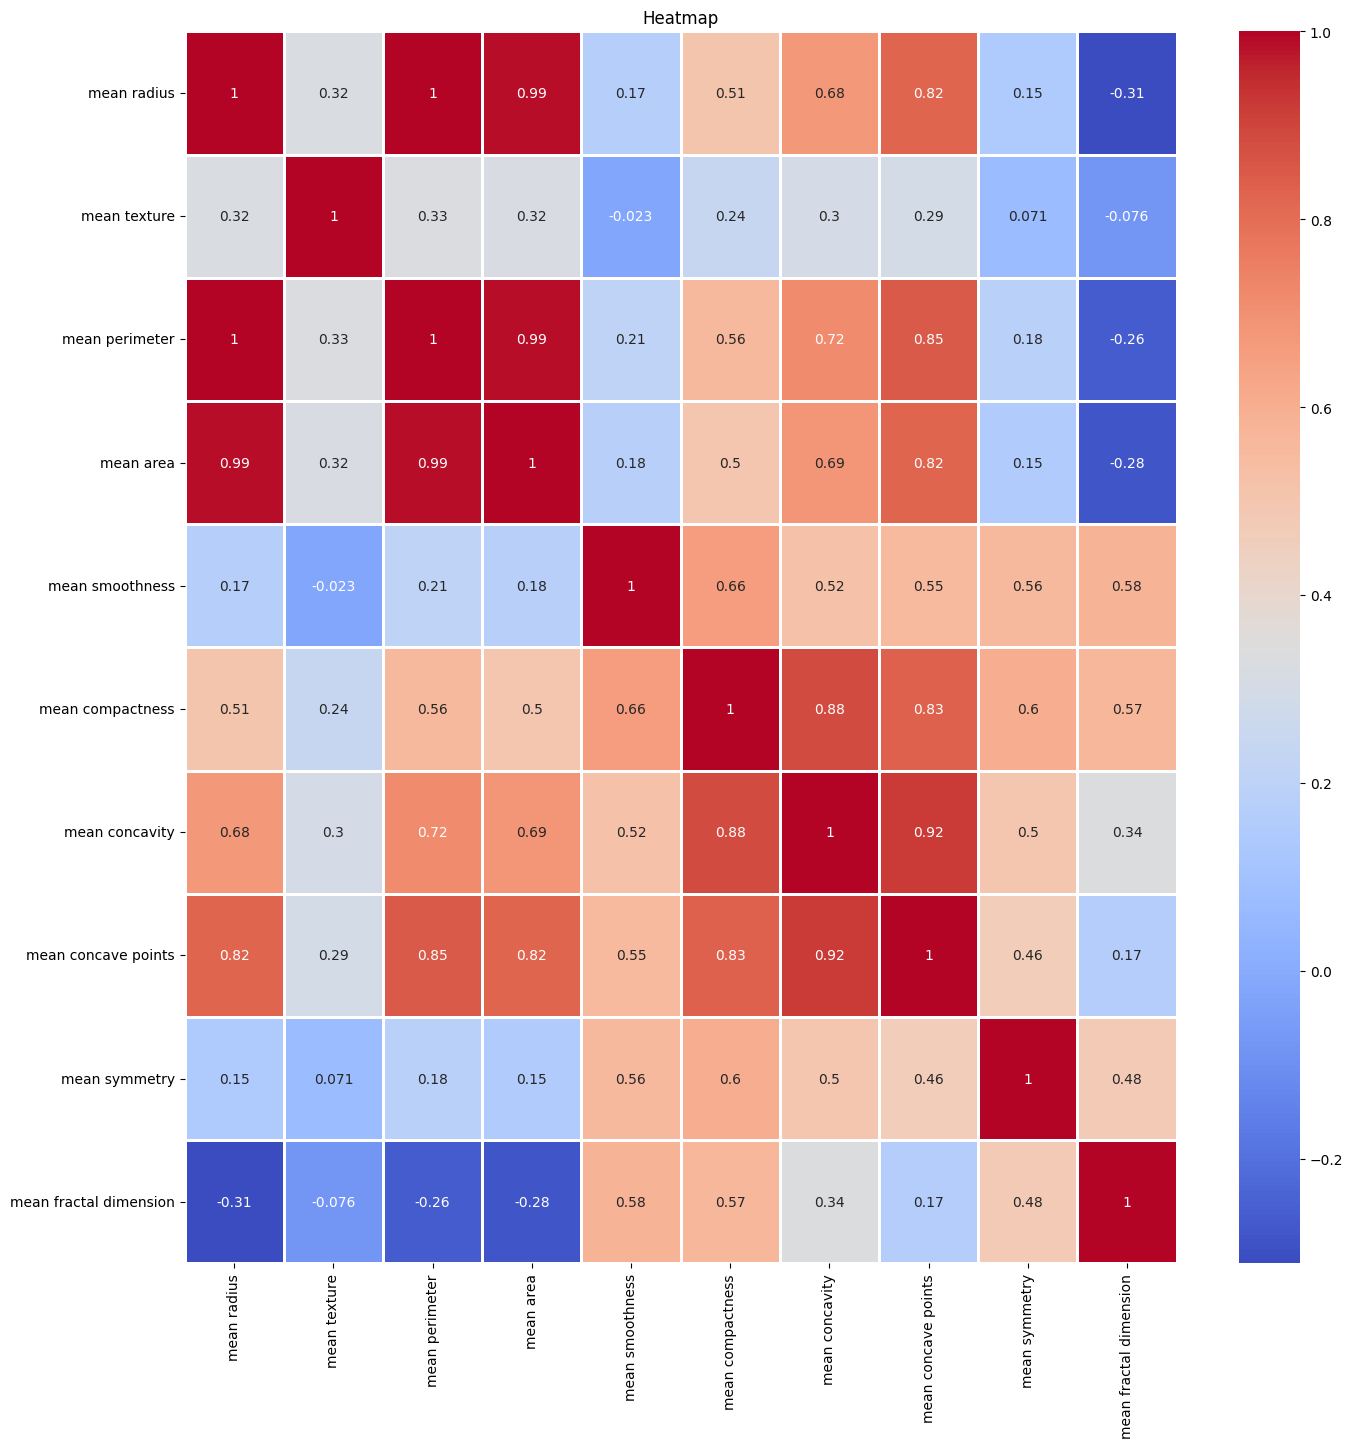

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=[16, 16])
sns.heatmap(df[columns].corr(), annot=True, cmap = 'coolwarm', linewidths=2, linecolor='white')
plt.title('Heatmap')
plt.savefig('big_heatmap.png')
plt.show()
plt.clf()

In [9]:
features = list(columns[:2]+columns[4:5]+columns[8:])

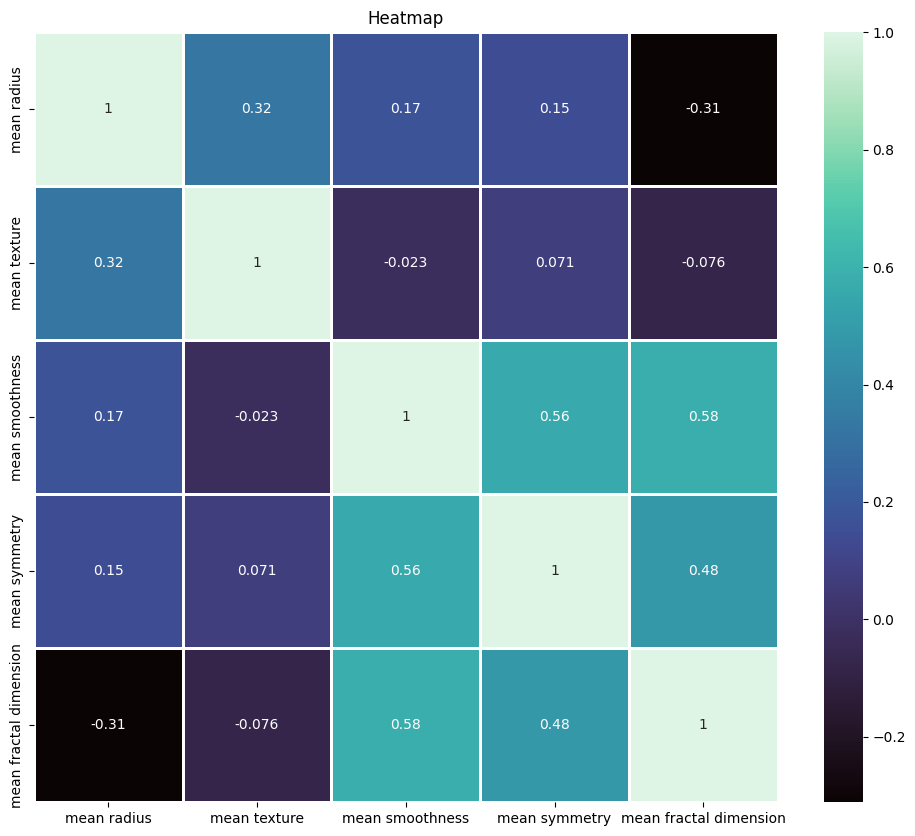

<Figure size 640x480 with 0 Axes>

In [10]:
# make a heatmap in order to decide what features must be dropped to avoid multicollinearity
plt.figure(figsize=[12, 10])
sns.heatmap(df[features].corr(), annot=True, cmap="mako", linewidths=2, linecolor='white')
plt.title('Heatmap')
plt.savefig('good_heatmap.png')
plt.show()
plt.clf()

In [11]:
# make X and y as predictor(df for the first run) and outcome(one D array) variables to the model
X = df[features]
y = data.target

In [12]:
type(X), type(y)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [13]:
a, b = np.sum(data.target == 0), np.sum(data.target == 1)
a,b

(212, 357)

In [14]:
b/(b+a)

0.6274165202108963

In [15]:
min_class_size = min(a, b)
# At a maximum, there should be no more than the smallest class size divided by 10 number of features.
max_features = min_class_size / 10
f'''The maximum of the features is {max_features} and the number of predictor variables is {len(X.columns)
}, so the assumption that the sample must be big enough is {max_features > X.columns.nunique()}'''

'The maximum of the features is 21.2 and the number of predictor variables is 5, so the assumption that the sample must be big enough is True'

<Figure size 1200x1000 with 0 Axes>

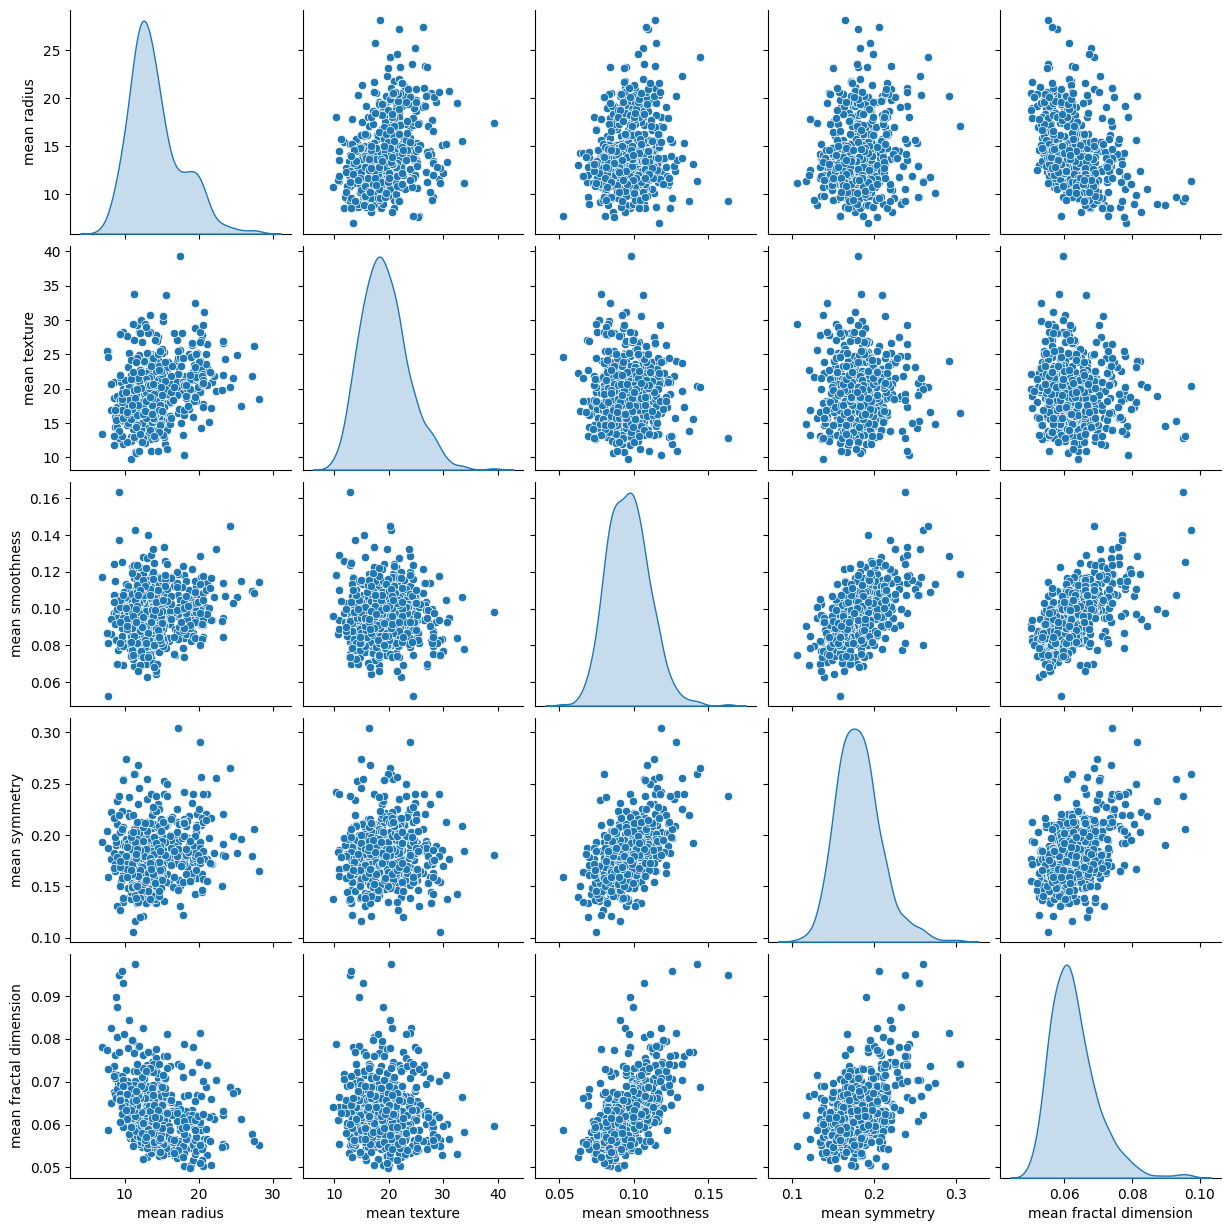

<Figure size 640x480 with 0 Axes>

In [16]:
# make a pairplot just for fun
plt.figure(figsize=[12, 10])
sns.pairplot(X, diag_kind = "kde")
plt.savefig('pairplot.png')
plt.show()
plt.clf()

In [17]:
X.head(3)

,mean radius,mean texture,mean smoothness,mean symmetry,mean fractal dimension
0,17.99,10.38,0.11840,0.2419,0.07871
1,20.57,17.77,0.08474,0.1812,0.05667
2,19.69,21.25,0.10960,0.2069,0.05999


In [18]:
# standardize the X values by initalizing the StandardScaler then fit and transform the dataframe (X) back into a 2D array
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [19]:
X

array([[ 1.09706398e+00, -2.07333501e+00,  1.56846633e+00,
         2.21751501e+00,  2.25574689e+00],
       [ 1.82982061e+00, -3.53632408e-01, -8.26962447e-01,
         1.39236330e-03, -8.68652457e-01],
       [ 1.57988811e+00,  4.56186952e-01,  9.42210440e-01,
         9.39684817e-01, -3.98007910e-01],
       ...,
       [ 7.02284249e-01,  2.04557380e+00, -8.40483881e-01,
        -8.09117071e-01, -8.95586935e-01],
       [ 1.83834103e+00,  2.33645719e+00,  1.52576706e+00,
         2.13719425e+00,  1.04369542e+00],
       [-1.80840125e+00,  1.22179204e+00, -3.11208479e+00,
        -8.20069901e-01, -5.61032377e-01]])

In [20]:
type(X), type(y), X.shape, y.shape

(numpy.ndarray, numpy.ndarray, (569, 5), (569,))

In [21]:
len(y), y.shape[0]

(569, 569)

In [22]:
# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

In [23]:
X_train, y_train.shape[0],  (len(y) - y_train.shape[0])/len(y)

(array([[ 3.71851501,  0.60046511,  0.92797735, -0.04241896, -0.72263924],
        [-1.31308049, -1.59395919,  0.42981926,  0.01234519,  0.88634137],
        [-0.94499809, -2.22924851, -0.0299095 , -1.57216424,  0.17045132],
        ...,
        [-0.92227695, -0.85395184,  0.30883801,  0.18028859,  0.78994429],
        [-1.44429505, -0.09067382,  0.23624926,  1.89258104,  3.49189762],
        [ 0.577318  ,  0.5236719 ,  0.31595455,  1.27192067, -0.55110915]]),
 455,
 0.20035149384885764)

In [24]:
np.sum(y_train == 1)/(np.sum(y_train == 1)+np.sum(y_train == 0))

0.6197802197802198

In [25]:
np.sum(y_test == 1)/(np.sum(y_test == 1)+np.sum(y_test == 0))

0.6578947368421053

In [26]:
# make a LogisticRegression model, fit the training X and y values and then predict y values with using test x values
lrm = LogisticRegression(penalty=None, fit_intercept=True, class_weight='balanced')
model = lrm.fit(X_train, y_train)
threshold = 0.25
y_pred = np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)
y_test, y_pred

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1]))

In [27]:
# Evaluate the model by using from sklearn.metrics import confusion_matrix and accuracy_score
#print(f'The prediction threshold is: {threshold}')
#print(f'''The confusion matrix is below:\n\n{confusion_matrix(y_test, y_pred)}
#\nThis represents the true positives, false positives in the first row, then false negatives and true negatives in the second row.\n''')
#print(f'The model is {round(100*accuracy_score(y_test, y_pred))}% accurate')
#print(f'The model is {round(100*precision_score(y_test, y_pred))}% precise')
#print(f'The model recall ratio is {round(100*recall_score(y_test, y_pred))}%')

In [28]:
thresholds = [i*1/5 for i in range(1, 5)]
for threshold in reversed(thresholds):
    y_pred = np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)
    print(f'''The prediction threshold is: {threshold}
Confusion matrix:\n{confusion_matrix(y_test, y_pred)}\n
Model accuracy: {round(100*accuracy_score(y_test, y_pred))}%
Model precision: {round(100*precision_score(y_test, y_pred))}%
Model recall ratio: {round(100*recall_score(y_test, y_pred))}%\n\n''')
print('\nConfusion matrix represents true positives, false positives in the first row, and false negatives, true negatives in the second row.')

The prediction threshold is: 0.8
Confusion matrix:
[[36  3]
 [ 8 67]]

Model accuracy: 90%
Model precision: 96%
Model recall ratio: 89%


The prediction threshold is: 0.6
Confusion matrix:
[[35  4]
 [ 3 72]]

Model accuracy: 94%
Model precision: 95%
Model recall ratio: 96%


The prediction threshold is: 0.4
Confusion matrix:
[[34  5]
 [ 2 73]]

Model accuracy: 94%
Model precision: 94%
Model recall ratio: 97%


The prediction threshold is: 0.2
Confusion matrix:
[[33  6]
 [ 1 74]]

Model accuracy: 94%
Model precision: 92%
Model recall ratio: 99%



Confusion matrix represents true positives, false positives in the first row, and false negatives, true negatives in the second row.


### Conclusion: 
`We can see that using lower prediction threshold means that we decrease not just the true positive count but also the number of false negatives.
It means that we made the model more sensitive in order to save lives and catch as much malignant cancer as possible. 
The precision of the model is secondary but it has not changed significantly.`

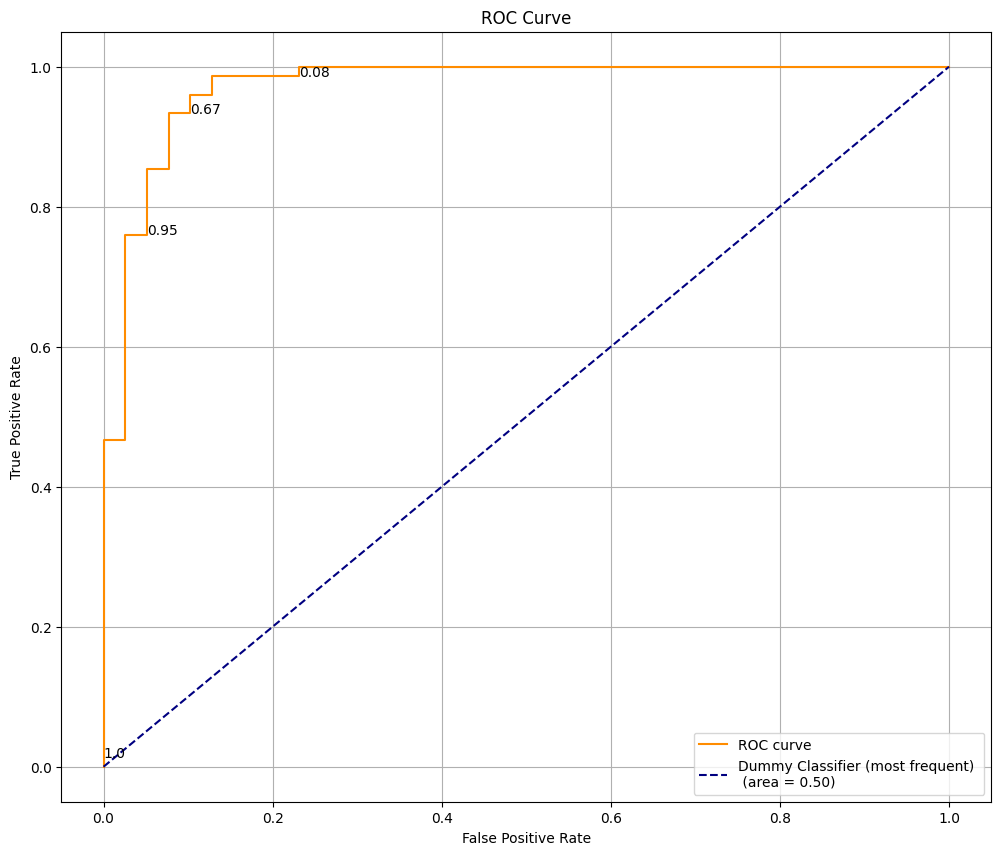

In [29]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure(figsize=[12, 10])
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
idx = list(range(len(thresholds)))[1::4]
for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(2))

clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X_train, y_train)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1] )
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='navy',linestyle='--', label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.savefig('ROC.png')
plt.show()

In [30]:
[np.random.randint(range(1, 11)) for _ in range(np.random.randint(5))]

[array([0, 0, 2, 0, 2, 5, 6, 6, 6, 6])]

In [31]:
np.random.randn(2,2)

array([[-1.54305022, -0.36581278],
       [ 0.35803178, -0.04336273]])

In [32]:
np.random.rand(3,2)

array([[0.49099888, 0.79568679],
       [0.47835258, 0.60775745],
       [0.40540569, 0.92416968]])

In [33]:
a = [2, 3, 5, 10, 10, 10, 50, 50, 90]

In [34]:
list_new = a[2::1]

In [35]:
list_new

[5, 10, 10, 10, 50, 50, 90]